<a href="https://colab.research.google.com/github/camocola/ADA-informes/blob/main/informe_2-MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de ordenamiento**

**Entrada:** sucesión de n números [a<sub>1</sub>, a<sub>2</sub>, ..., a<sub>n</sub>].

**Salida:** permutación ordenada de la secuencia ingresada  **[a<sup>'</sup><sub>1</sub>,a<sup>'</sup><sub>2</sub>, ..., a<sup>'</sup><sub>n</sub> ]** tal que **a<sup>'</sup><sub>1</sub> =< a<sup>'</sup><sub>2</sub> =< ... =< a<sup>'</sup><sub>n</sub>**.

El tamaño del problema está determinado según la cantidad de elementos ***n*** que son ingresados. 

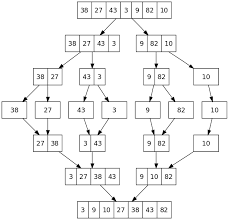


Desde el comienzo de la era tecnológica ha sido un tema a investigar el problema del ordenamiento, al cual se le han buscado diversas soluciones en búsqueda de la resolución más eficaz, tales como *BubbleSort*, *QuickSort* y *SelectionSort*. En este caso vamos a analizar *MergeSort*, el cual caracteriza por ocupar el método de *divide y vencerás*.



# **2. Merge y Merge Sort**


El siguiente código muestra la implementación de la función **Merge** y del algoritmo **Merge Sort**. 

## **2.1 Código**

In [1]:
import random
from termcolor import colored 
import copy

#array de contador de llamadas recursivas y de comparaciones, posición 0 llamadas recursivas/ posición 1 comparaciones del merge
cont = [0,0]

def merge(array, izquierda, derecha, verbose, cont):
  if verbose == True:
    print("Subarreglo izquierdo: ", izquierda)
    print("Subarreglo derecho: ", derecha, "\n")
  
  #iteradores para revisar cada mitad
  i = 0
  j = 0
  #iterador para variable central
  k = 0

  while i < len(izquierda) and j < len(derecha):
        if izquierda[i] <= derecha[j]:
          #se inserta el valor de la izquierda 
          cont[1] += 1
          array[k] = izquierda[i]
          if verbose == True:
            print("El elemento del subarreglo izquierdo es menor: ", izquierda[i], " < ", derecha[j])
          i += 1
        else:
          #se inserta el valor de la derecha
          cont[1] += 1
          array[k] = derecha[j]
          if verbose == True:
            print("El elemento del subarreglo derecho es menor: ", derecha[j], " < ", izquierda[i])
          j += 1
        #moverse a la siguiente casilla
        k += 1
        if verbose == True:
          print(array[:k], "\n")

  # revisar si hay algún elemento que falta
  while i < len(izquierda):
      array[k] = izquierda[i]
      cont[1] += 1
      if verbose == True:
        print("Se agregan los elementos restantes: ", izquierda[i])
      i += 1
      k += 1
      if verbose == True:
          print(array[:k], "\n")

  while j < len(derecha):
      array[k]=derecha[j]
      cont[1] += 1
      if verbose == True:
        print("Se agregan los elementos restantes: ", derecha[j])
      j += 1
      k += 1
      if verbose == True:
          print(array[:k], "\n")


def mergeSort(array, cont1, verbose = False):
    if verbose == True: 
      print("Arreglo inicial: ", array, "\n")
    
    if len(array) > 1:
      #dividir el arreglo en 2
      mitad = len(array)//2 
      #asignar derecha e izquierda a las mitades del arreglo
      derecha = array[mitad:]
      izquierda = array[:mitad]

      #llamado recursivo a cada mitad
      cont[0] += 1
      mergeSort(derecha, cont, verbose = False)
      mergeSort(izquierda, cont, verbose = False)
      merge(array, izquierda, derecha, verbose, cont)
      if verbose == True:
        print("El arreglo se encuentra ordenado: ", array, "\n")

#Ejemplo 
array = [19, 5, 12, 6, 7, 2, 1, 10, 9]
print("Arreglo ingresado: ", array)
mergeSort(array, cont, verbose = False)
print("Arreglo ordenado: ", array)
print("Cantidad de llamadas recursivas: ", str(cont[0]))
print("Cantidad de comparaciones: ", str(cont[1]))

Arreglo ingresado:  [19, 5, 12, 6, 7, 2, 1, 10, 9]
Arreglo ordenado:  [1, 2, 5, 6, 7, 9, 10, 12, 19]
Cantidad de llamadas recursivas:  8
Cantidad de comparaciones:  29


## **2.2 Descripción del algoritmo**



El algoritmo recibe como entrada un arreglo *array* con una secuencia de ***n*** elementos que queremos ordenar. Posteriormente, el arreglo se divide hasta quedar con los elementos individuales. Luego la función *Merge* junta y ordena los elementos, de modo que queda el arreglo original ordenado.


1.   Primero se declara un arreglo ```cont = [0,0]```que funcionará como contador de la cantidad de llamadas recursivas que realice *MergeSort* *(posición 0)* y la cantidad de comparaciones que realice la función *Merge* *(posición 1)*.  


2.   Se toma el arreglo ingresado y se divide en cada ```mitad```. Se asigna una ```derecha``` e ```izquierda```, después se llama a *MergeSort* recursivamente hasta que los elementos estén separados individualmente y se aumenta ```cont[0]```, el cual es el contador de llamados recursivos que realiza el algoritmo. 


3.   Se crean iteradores para recorrer cada mitad *(i,j)* y una para acceder a la variable central *(k)*. Después, mientras cada iterador sea más pequeño al largo de su subarreglo (``` while i < len(izquierda) and j < len(derecha):```), se realiza una comparación del valor de los elementos en la casilla *i-ésima* y *j-ésima* ```(if izquierda[i] <= derecha[j]:)``` y se inserta en `array[k]` el valor más pequeño. Además se aumenta el contador `cont[1]`, el cual tiene la cantidad de comparaciones que hace la función *Merge* y se pasa a la siguiente casilla de la mitad de la cual se insertó el elemento (`i += 1/ j += 1`). Este proceso se repite hasta que uno de los subarreglos se incluye por completo. 


4. Se revisa que todos los elementos de los subarreglos han sido añadidos (```while i < len(izquierda):```/```while j < len(derecha):```). Si existen elementos por agregar, se insertan en `array[k]` asumiendo que estos ya se encuentran ordenados y se aumenta `cont[1]`, ya que se recorre el arreglo para agregar los últimos elementos faltantes. 


Si la variable `verbose` es `True` se muestra información para ver lo que ocurre paso a paso dentro de la función.

## **2.3 Ejemplo**
En la siguiente imagen vemos un ejemplo de *MergeSort* aplicado a un arreglo **A=[4,5,6,3,7,9,1]**.



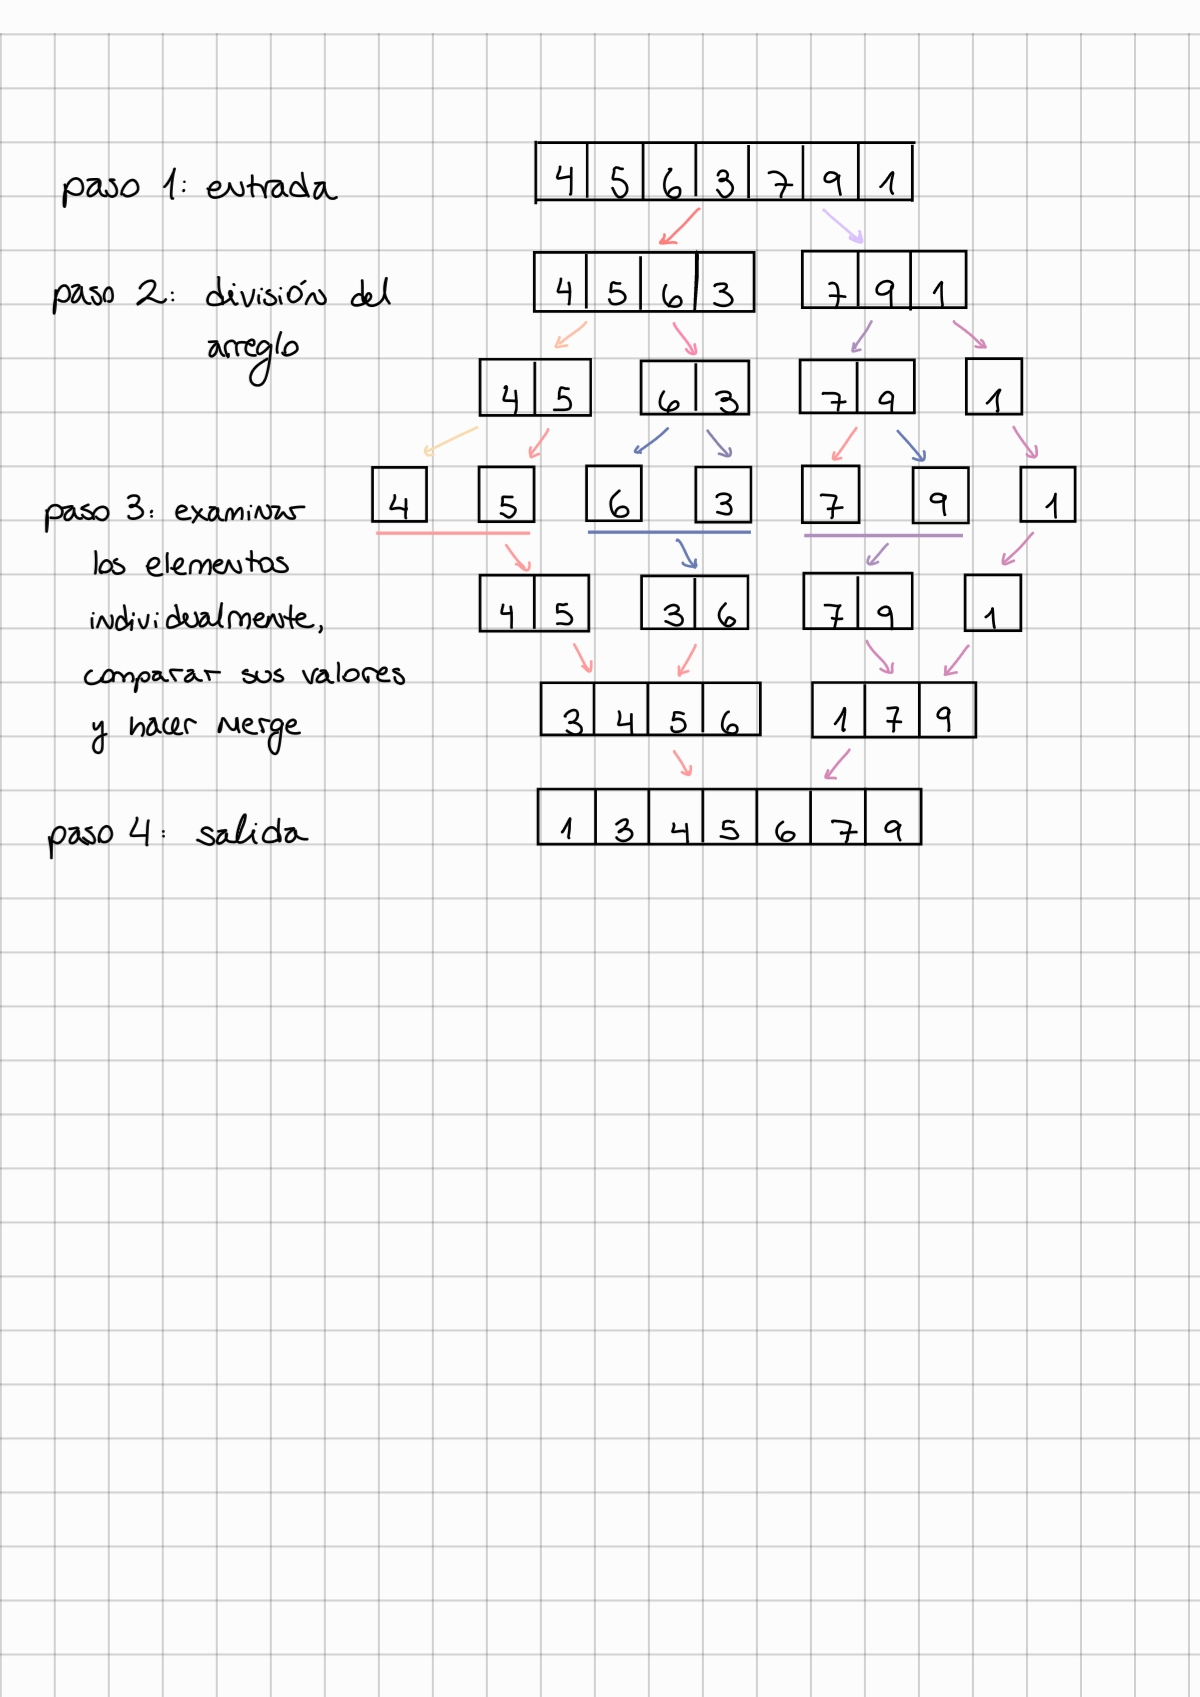


## **2.4 Ejecución del algoritmo paso a paso (verbose = True)**

Utilizando la opción `verbose = True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [2]:
import random
a = random.sample(range(1, 100), 6)
cont = [0,0]
mergeSort(a,cont, verbose=True)  

Arreglo inicial:  [41, 8, 81, 12, 58, 82] 

Subarreglo izquierdo:  [8, 41, 81]
Subarreglo derecho:  [12, 58, 82] 

El elemento del subarreglo izquierdo es menor:  8  <  12
[8] 

El elemento del subarreglo derecho es menor:  12  <  41
[8, 12] 

El elemento del subarreglo izquierdo es menor:  41  <  58
[8, 12, 41] 

El elemento del subarreglo derecho es menor:  58  <  81
[8, 12, 41, 58] 

El elemento del subarreglo izquierdo es menor:  81  <  82
[8, 12, 41, 58, 81] 

Se agregan los elementos restantes:  82
[8, 12, 41, 58, 81, 82] 

El arreglo se encuentra ordenado:  [8, 12, 41, 58, 81, 82] 



# **3. Tiempo de ejecución**

## **Teorema (tiempo de ejecución)**
El algoritmo *MergeSort* tiene un tiempo de ejecución $O(n log(n))$ en **todos** los casos. 

## **Prueba del teorema: Inducción matemática**



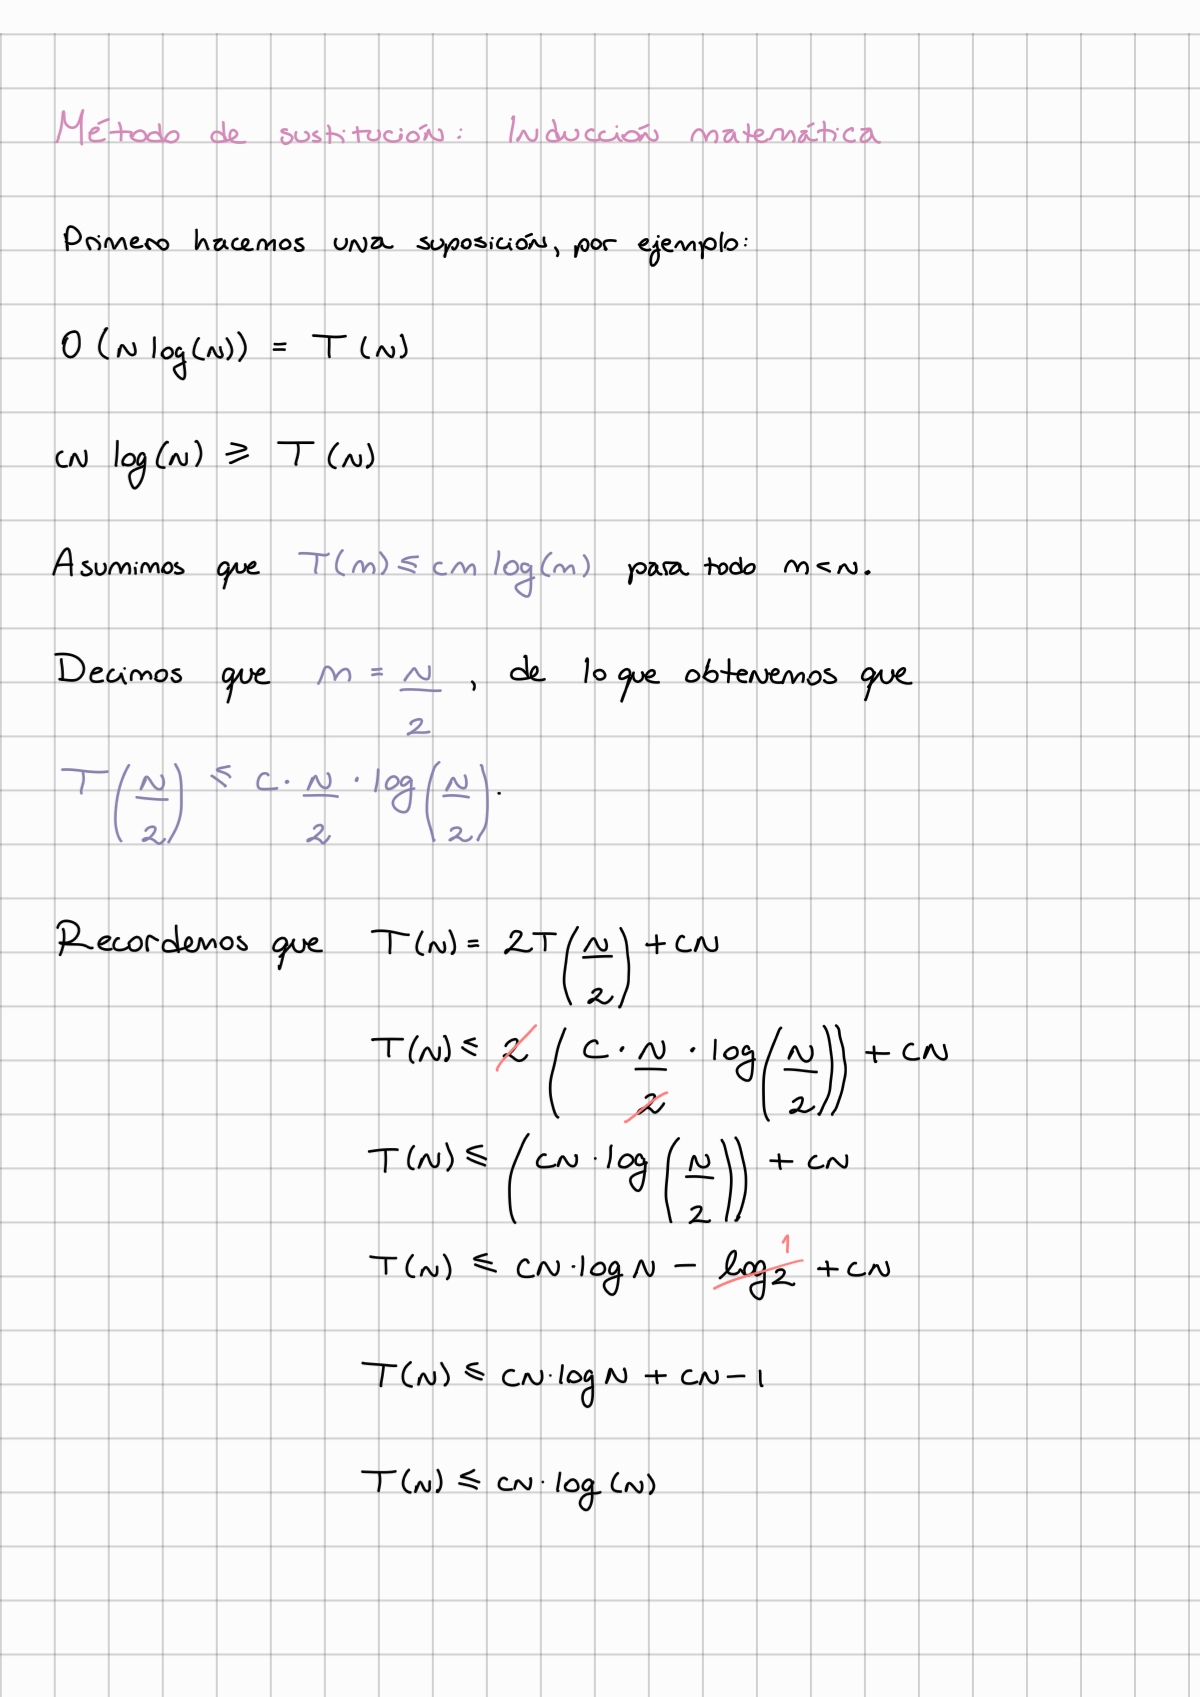

## **Prueba del teorema: Árbol de recursión**

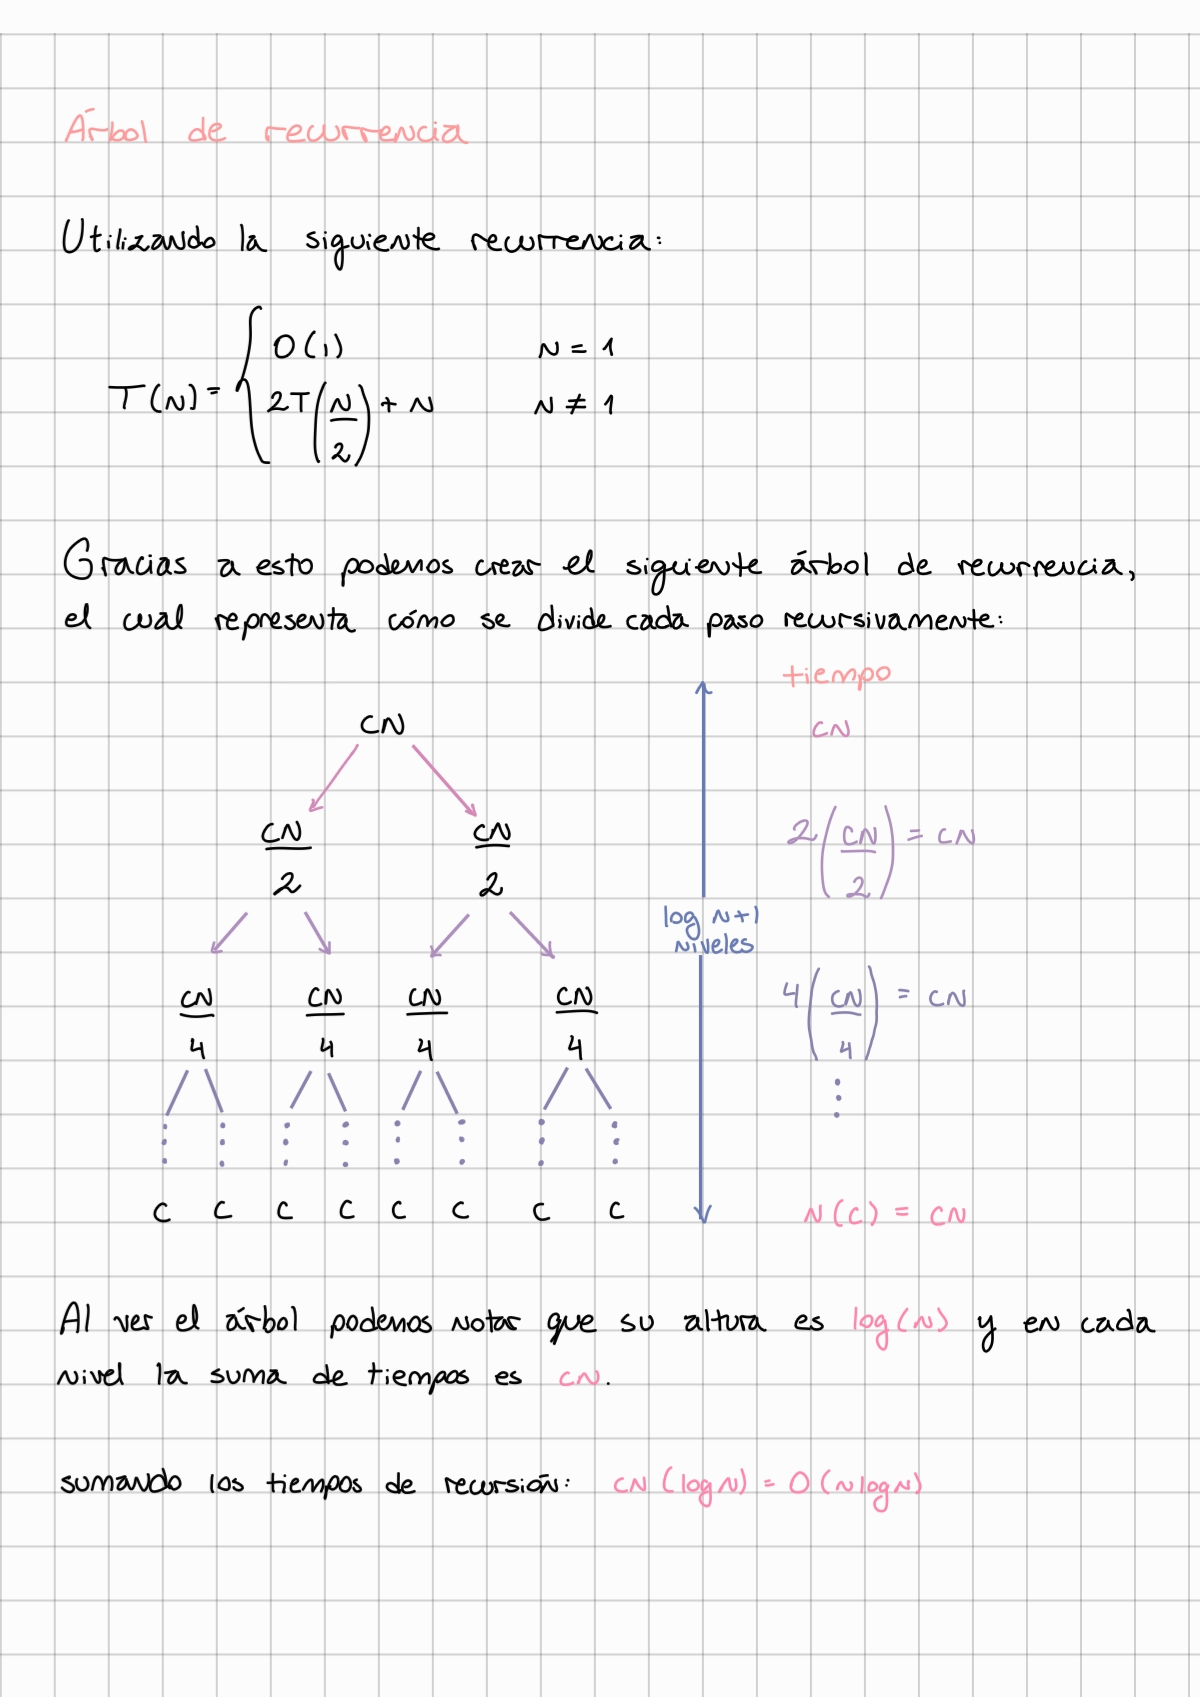

# **4. Correctitud**

##**Teorema (Correctitud).**

El algoritmo **MergeSort** genera un arreglo: `[a1,a2,...an]`, con los mismos elementos del arreglo de entrada, pero ordenados de menor a mayor, es decir `a1<=a2<=...<=an`.

Para comprobar el teorema utilizaremos la *inducción matemática* (mergesort) y la propiedad del *bucle invariante* (merge).

### **Bucle invariante (Merge)**

La propiedad invariante del ciclo nos asegura que la función `merge()` es correcta.
Como sabemos, la función merge recibe dos arreglos de largo $m$ y $n$. Es importante
recalcar que estos dos arreglos ya se encuentran ordenados. Si añadimos cada vez
el menor elemento entre ambos arreglos iterándolos al mismo tiempo formaremos un
nuevo arreglo ordenado, por lo que nuestra invariante de ciclo sería $A[k] \leq
l[i] \land A[k] \leq r[j]$.

**Inicialización**: En una primera instancia el arreglo $A$ se encuentra vacío,
así que está ordenado.

**Mantención**: Al arreglo $A$ se añade el elemento $l[i]$ ó $r[j]$ dependiendo de
cual es el menor. Sabemos que $A[k-1] \leq l[i] \lor A[k-1] \leq r[j]$. Por lo tanto
los elementos insertados serán siempre mayores.
Se itera $i$ o $j$, dependiendo de cual hayamos añadido. Sabemos que todo elemento
$l[i+1] \geq l[i] \land r[j+1] \geq r[j]$ ya que los arreglos $l$ y $r$ están
ordenados de antemano.

**Finalización**: Una vez que recorrimos uno de los dos arreglos por completo
(el más corto) insertamos los elementos restantes del otro arreglo.

### **Inducción matemática (MergeSort)**

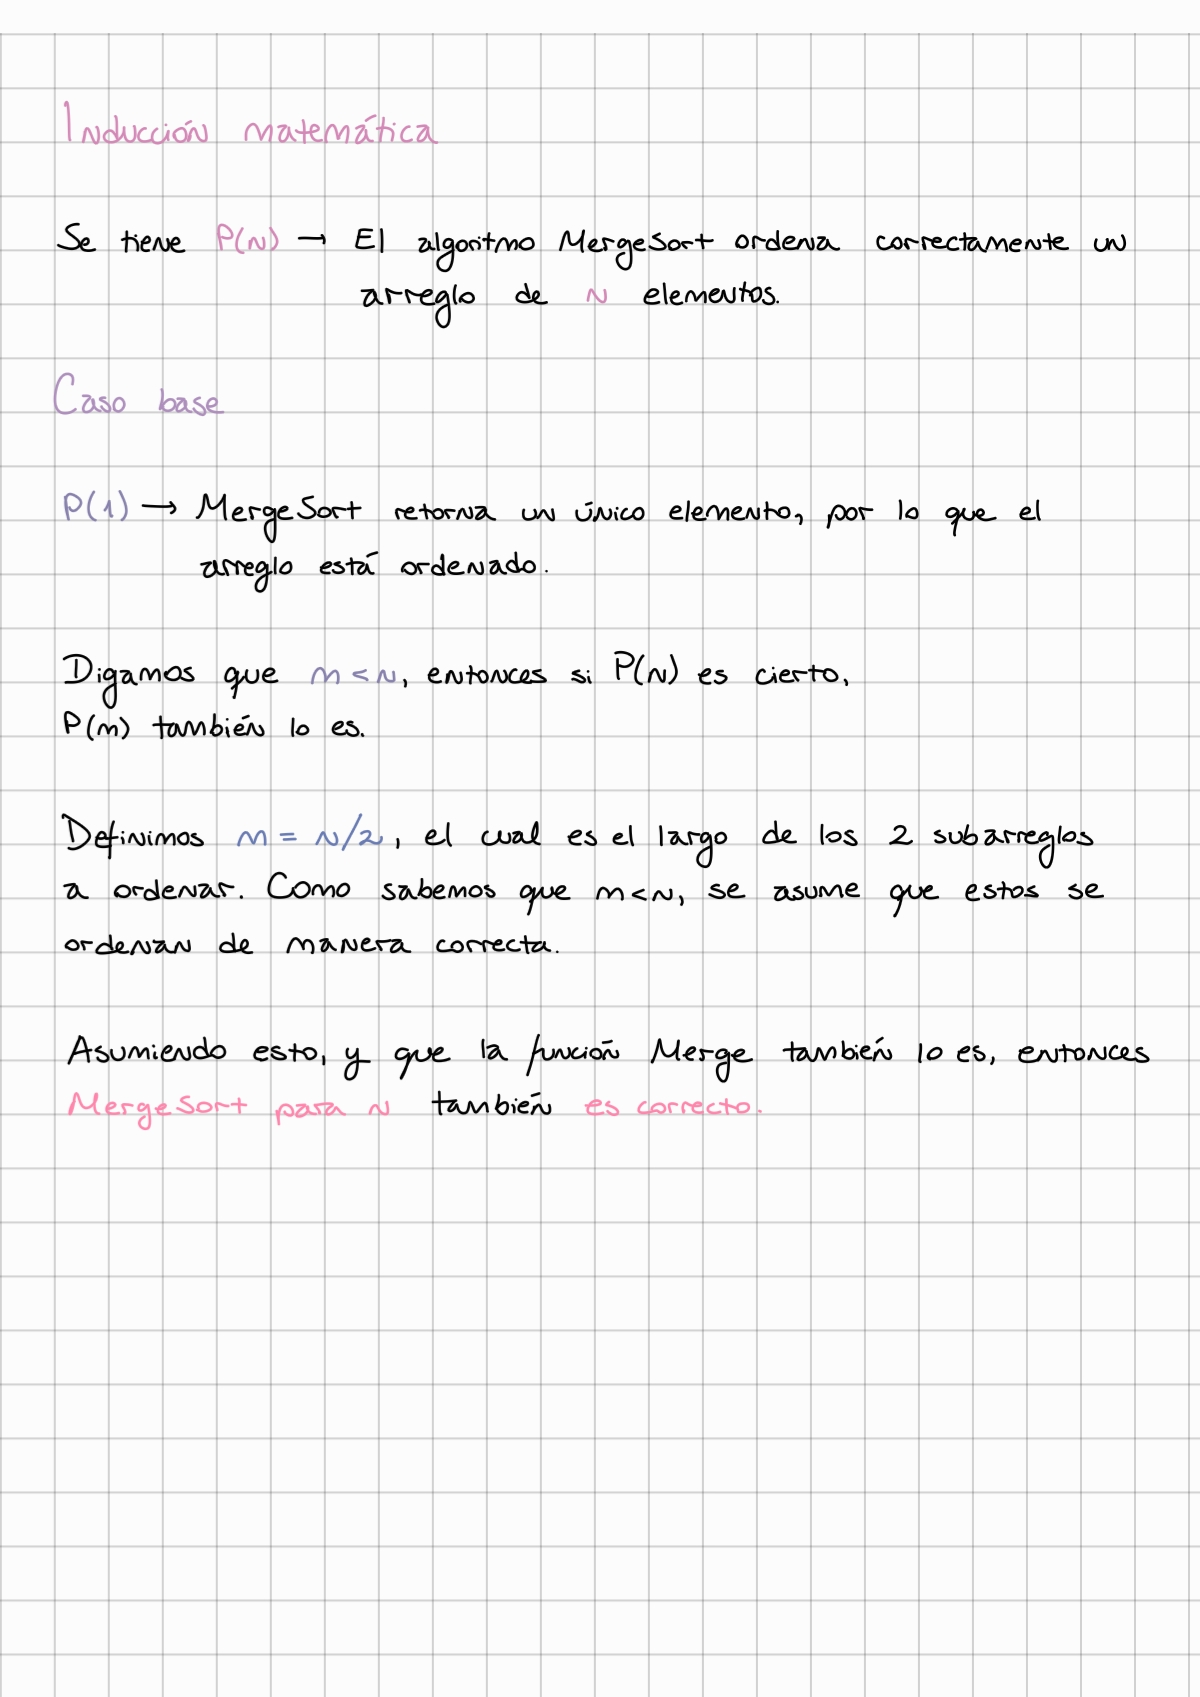

# **5. Experimentos**

## **5.1 Número de comparaciones**

A continuación se muestra gráficamente una comparación entre:

*   cantidad de comparaciones del peor caso calculadas matemáticamente,
*   cantidad de comparaciones del mejor caso calculadas matemáticamente,
*   cantidad de comparaciones realizadas experimentalmente para entradas aleatorias para tamaños de problemas con n ∈ [5,19] .

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre 1 y 100.

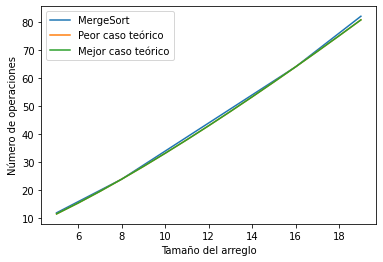

In [3]:
import matplotlib.pyplot as plt
from math import log2

x=[n for n in range(5,20)] 
y1=[n*log2(n) for n in range(5,20)] # peor caso
y2=[n*log2(n) for n in range(5,20)] # mejor caso
y=[]; 

for n in range(5,20):
  cont = [0,0]
  a = random.sample(range(1, 100), n)
  mergeSort(a, cont, verbose = False)
  y.append(cont[1])

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Número de operaciones')
plt.show()

### **Análisis de resultados**
En el gráfico se puede ver de forma clara que no hay diferencias entre el caso que analicemos, ya que todos se comportan del mismo modo **(mejor caso =  caso promedio = peor caso)**. Esto se debe a que el algoritmo *MergeSort* **siempre** divide el arreglo en dos mitades y toma tiempo lineal para hacer *merge* en las dos mitades, sin importar que tan ordenado se encuentra el arreglo ingresado. 

## **5.3 Comparación tiempo de ejecución InsertionSort y MergeSort**
En los siguientes gráficos se muestra el tiempo de ejecución de los algoritmos *InsertionSort* y *MergeSort*. Para este experimento generamos arreglos de tamaño aleatorio, entre el rango de 5 y 500.

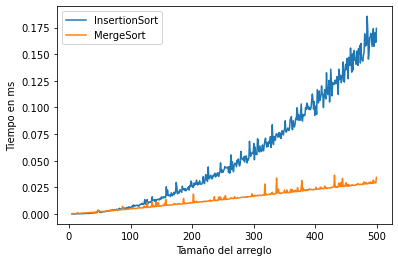

In [19]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def insertionSort(array, verbose = False):
    n = len(array) #Largo del arreglo
    comp = 0 #Contador de comparaciones
    already_sorted = False #Flag que indica si el arreglo se encuentra ordenado
  
    #Se recorre el arreglo partiendo desde 1
    for i in range(1, n):
        key = array[i] #Valor en posición i
        j = i - 1 #Valor anterior a la posición i
        
        # Comparar key hasta que se encuentre un elemento más pequeño que él      
        while j >= 0 and key < array[j]:
            comp = comp + 1 
            array[j + 1] = array[j]
            j = j - 1
            
            # Asignar key después del elemento justo más pequeño que él
            array[j + 1] = key

    already_sorted = True
        
    return array, comp

x=[]; y=[]; y1=[]

for n in range(5,500):

  a = random.sample(range(1, 500), n)
  cont = [0,0]
  verbose = False

  #la función repeat está ejecutando 20 veces MergeSort/InsertionSort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a},{cont},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(t2)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["InsertionSort", "MergeSort"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

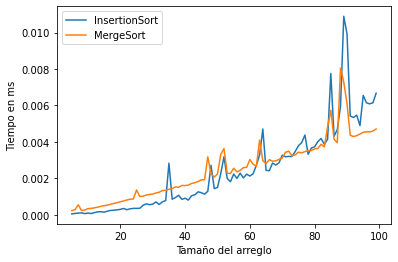

In [20]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def insertionSort(array, verbose = False):
    n = len(array) #Largo del arreglo
    comp = 0 #Contador de comparaciones
    already_sorted = False #Flag que indica si el arreglo se encuentra ordenado
  
    #Se recorre el arreglo partiendo desde 1
    for i in range(1, n):
        key = array[i] #Valor en posición i
        j = i - 1 #Valor anterior a la posición i
        
        # Comparar key hasta que se encuentre un elemento más pequeño que él      
        while j >= 0 and key < array[j]:
            comp = comp + 1 
            array[j + 1] = array[j]
            j = j - 1
            
            # Asignar key después del elemento justo más pequeño que él
            array[j + 1] = key

    already_sorted = True
        
    return array, comp

x=[]; y=[]; y1=[]

for n in range(5,100):

  a = random.sample(range(1, 100), n)
  cont = [0,0]
  verbose = False

  #la función repeat está ejecutando 20 veces MergeSort/InsertionSort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a},{cont},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(t2)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["InsertionSort", "MergeSort"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**
Comparando ambos algoritmos podemos apreciar que no existe una gran diferencia en el primer gráfico, pero analizando un gráfico donde se toman arreglos más pequeños se aprecia que *InsertionSort* es más eficiente hasta el tamaño 60, después se vuelve más impredecible. 

Por otro lado MergeSort es más eficiente para arreglos de mayor tamaño, donde la diferencia entre ambos algoritmos es bastante marcada; *InsertionSort* llega hasta los 0.175 *ms* mientras que *MergeSort* pasa ligeramente sobre los 0.025 *ms*. 

Por último, podemos decir que *MergeSort* no debería tener tantos *peaks* como se ve en el primer gráfico, lo cual puede ser atribuido al impredecible comportamiento del procesador. 